In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.cm as cm
from scipy.stats import linregress
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd12 = pd.read_csv('Poverty_Data/2012_Poverty_Data.csv')
pd13 = pd.read_csv('Poverty_Data/2013_Poverty_Data.csv')
pd14 = pd.read_csv('Poverty_Data/2014_Poverty_Data.csv')
pd15 = pd.read_csv('Poverty_Data/2015_Poverty_Data.csv')
pd16 = pd.read_csv('Poverty_Data/2016_Poverty_Data.csv')
pd17 = pd.read_csv('Poverty_Data/2017_Poverty_Data.csv')

In [3]:
split = pd12["County"].str.split("County", n = 1, expand = True)
pd12["County"]= split[0]
pd12 = pd12[["County", "Population", 
             "Poverty Count", "Total Poverty Rate (%)"]]

split = pd13["County"].str.split("County", n = 1, expand = True)
pd13["County"]= split[0]
pd13 = pd13[["County", "Population", 
             "Poverty Count", "Total Poverty Rate (%)"]]

split = pd14["County"].str.split("County", n = 1, expand = True)
pd14["County"]= split[0]
pd14 = pd14[["County", "Population", 
             "Poverty Count", "Total Poverty Rate (%)"]]

split = pd15["County"].str.split("County", n = 1, expand = True)
pd15["County"]= split[0]
pd15 = pd15[["County", "Population", 
             "Poverty Count", "Total Poverty Rate (%)"]]

split = pd16["County"].str.split("County", n = 1, expand = True)
pd16["County"]= split[0]
pd16 = pd16[["County", "Population", 
             "Poverty Count", "Total Poverty Rate (%)"]]

split = pd17["County"].str.split("County", n = 1, expand = True)
pd17["County"]= split[0]
pd17 = pd17[["County", "Population", 
             "Poverty Count", "Total Poverty Rate (%)"]]

In [4]:
sd12 = pd.read_csv('Sales_Data/2012_sales.csv')
sd13 = pd.read_csv('Sales_Data/2013_sales.csv')
sd14 = pd.read_csv('Sales_Data/2014_sales.csv')
sd15 = pd.read_csv('Sales_Data/2015_sales.csv')
sd16 = pd.read_csv('Sales_Data/2016_sales.csv')
sd17 = pd.read_csv('Sales_Data/2017_sales.csv')

In [5]:
del sd12["Unnamed: 0"]
del sd13["Unnamed: 0"]
del sd14["Unnamed: 0"]
del sd15["Unnamed: 0"]
del sd16["Unnamed: 0"]
del sd17["Unnamed: 0"]

In [6]:
c12 = sd12.reset_index(drop=True).merge(pd12.reset_index(drop=True), left_index=True, right_index=True)
del c12["County_y"]
c12 = c12.rename(columns={"County_x":"County"})

c13 = sd13.reset_index(drop=True).merge(pd13.reset_index(drop=True), left_index=True, right_index=True)
del c13["County_y"]
c13 = c13.rename(columns={"County_x":"County"})

c14 = sd14.reset_index(drop=True).merge(pd14.reset_index(drop=True), left_index=True, right_index=True)
del c14["County_y"]
c14 = c14.rename(columns={"County_x":"County"})

c15 = sd15.reset_index(drop=True).merge(pd15.reset_index(drop=True), left_index=True, right_index=True)
del c15["County_y"]
c15 = c15.rename(columns={"County_x":"County"})

c16 = sd16.reset_index(drop=True).merge(pd16.reset_index(drop=True), left_index=True, right_index=True)
del c16["County_y"]
c16 = c16.rename(columns={"County_x":"County"})

c17 = sd17.reset_index(drop=True).merge(pd17.reset_index(drop=True), left_index=True, right_index=True)
del c17["County_y"]
c17 = c17.rename(columns={"County_x":"County"})

In [8]:
bins = [0, 24000, 99999, 500000]
city_type = ["Rural", "Suburban", "Urban"]

pd12["City Type"] = pd.cut(pd12["Population"],bins,labels=city_type)
city_type12 = pd12.groupby("City Type")
avg_poverty12 = city_type12["Total Poverty Rate (%)"].mean()

pd13["City Type"] = pd.cut(pd13["Population"],bins,labels=city_type)
city_type13 = pd13.groupby("City Type")
avg_poverty13 = city_type13["Total Poverty Rate (%)"].mean()

pd14["City Type"] = pd.cut(pd14["Population"],bins,labels=city_type)
city_type14 = pd14.groupby("City Type")
avg_poverty14 = city_type14["Total Poverty Rate (%)"].mean()

pd15["City Type"] = pd.cut(pd15["Population"],bins,labels=city_type)
city_type15 = pd15.groupby("City Type")
avg_poverty15 = city_type15["Total Poverty Rate (%)"].mean()

pd16["City Type"] = pd.cut(pd16["Population"],bins,labels=city_type)
city_type16 = pd16.groupby("City Type")
avg_poverty16 = city_type16["Total Poverty Rate (%)"].mean()

pd17["City Type"] = pd.cut(pd17["Population"],bins,labels=city_type)
city_type17 = pd17.groupby("City Type")
avg_poverty17 = city_type17["Total Poverty Rate (%)"].mean()

city_df = pd.DataFrame({"City Type": city_type,
                        "2012": avg_poverty12, "2013": avg_poverty13,
                        "2014": avg_poverty14, "2015": avg_poverty15, 
                        "2016": avg_poverty16, "2017": avg_poverty17})
cit

City Type       2012       2013       2014       2015       2016  \
City Type                                                                    
Rural         Rural  11.284512  11.239324  11.388468  11.270956  11.316686   
Suburban   Suburban  11.246703  11.458112  11.734518  11.581775  11.367314   
Urban         Urban  13.368093  13.660427  13.611677  13.365991  13.099852   

                2017  
City Type             
Rural      10.996516  
Suburban   10.980308  
Urban      13.040571

<IPython.core.display.Javascript object>


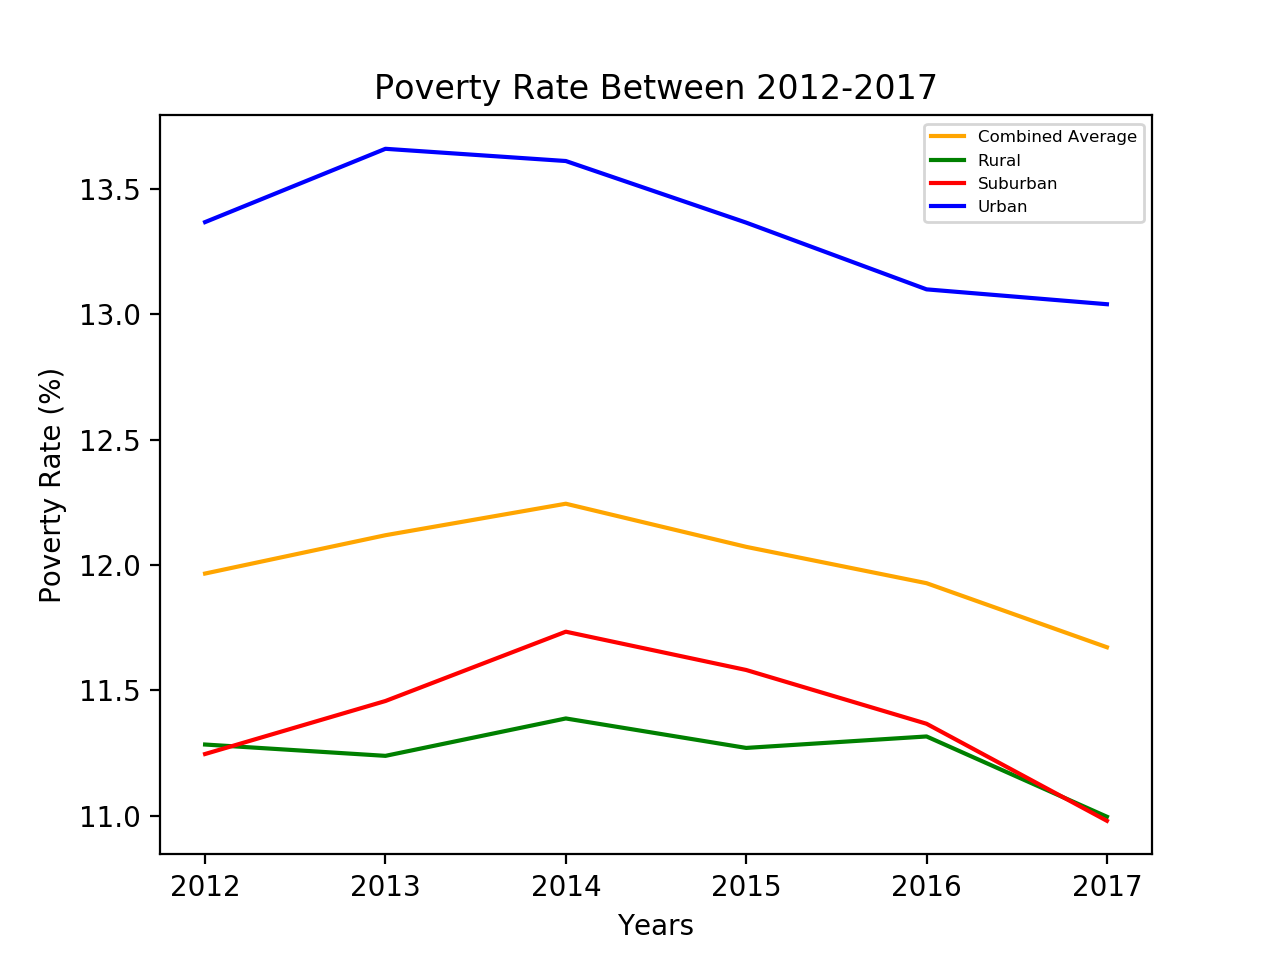

In [8]:
combined_rate = city_df.mean()
years = combined_rate.keys()

total_avg, = plt.plot(years, combined_rate, color="orange", label="Combined Average" )

rural, = plt.plot(years, city_df.loc['Rural',["2012","2013","2014","2015","2016", "2017"]], 
                        color="green",label=city_df.loc['Rural',"City Type"])

suburban, = plt.plot(years, city_df.loc['Suburban',["2012","2013","2014","2015","2016", "2017"]], 
                        color="red",label=city_df.loc['Suburban',"City Type"])

urban, = plt.plot(years, city_df.loc['Urban',["2012","2013","2014","2015","2016", "2017"]], 
                        color="blue",label=city_df.loc['Urban',"City Type"])

plt.legend(handles=[total_avg, rural, suburban, urban], loc="best", prop={'size': 6})
plt.xlabel("Years")
plt.ylabel("Poverty Rate (%)")
plt.title("Poverty Rate Between 2012-2017")
plt.savefig("Poverty Line Graph.png")
plt.show()

<IPython.core.display.Javascript object>


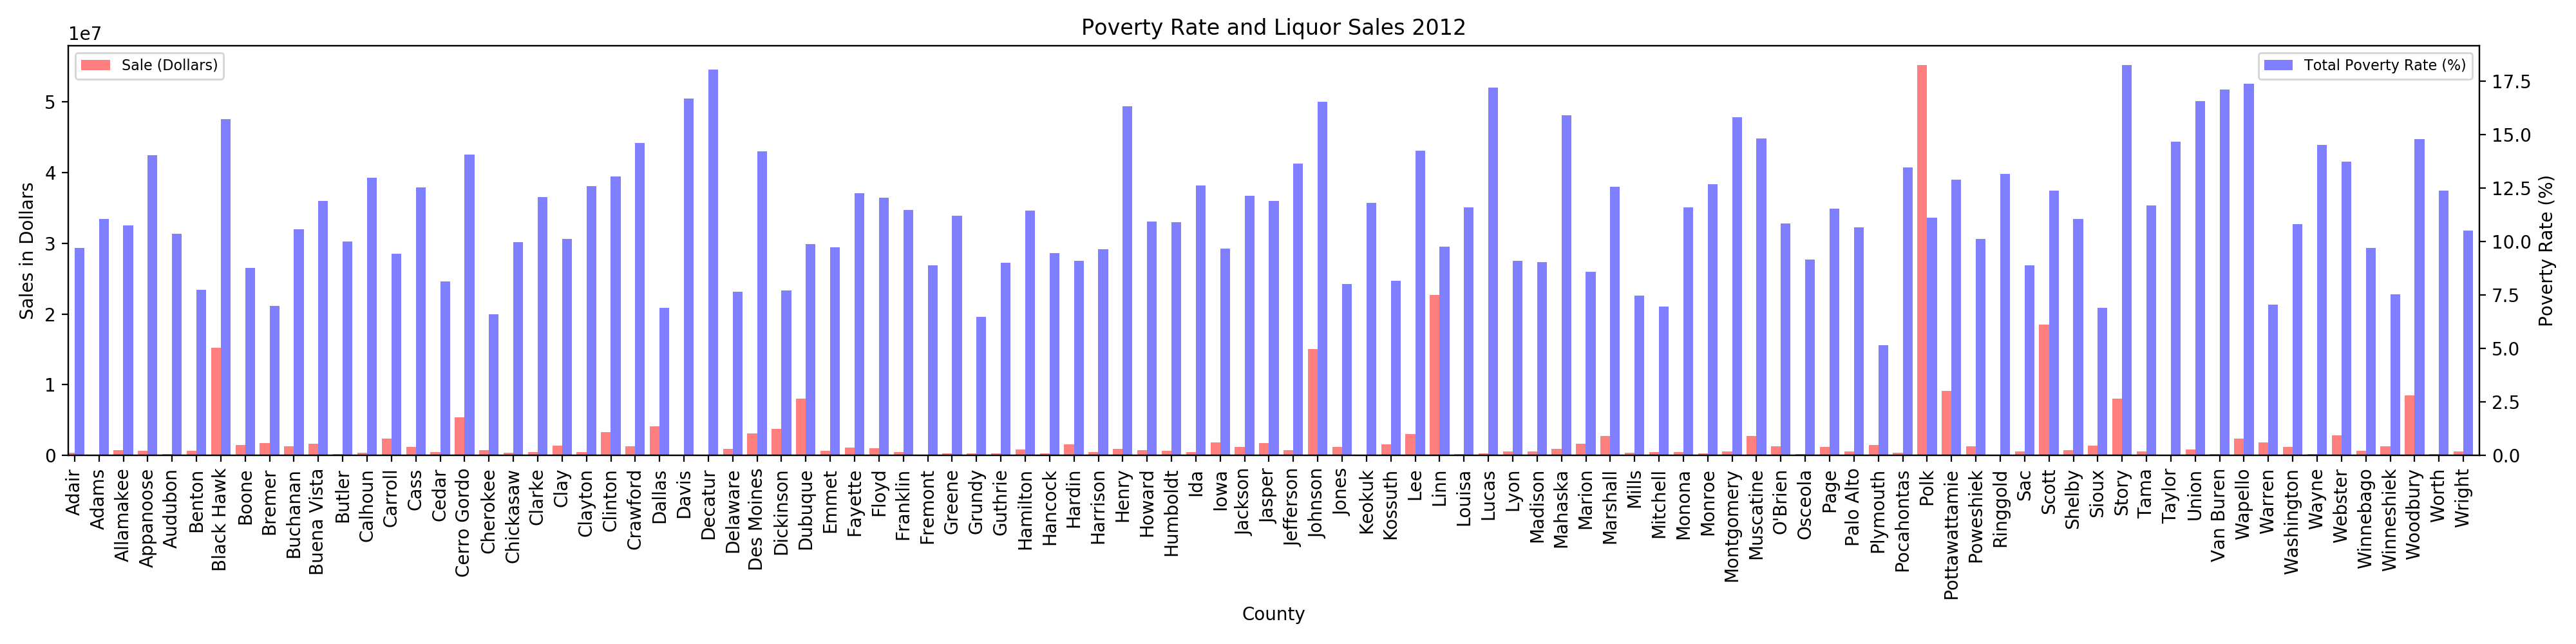

In [9]:
fig = plt.figure(figsize=(20,5)) 
ax = fig.add_subplot(111) 
ax2 = ax.twinx() 
width = 0.4

c12["Sale (Dollars)"].plot(kind='bar', color='r', alpha=0.5, ax=ax, width=width,  position=1, align="edge")
c12["Total Poverty Rate (%)"].plot(kind='bar', color='b', alpha=0.5, ax=ax2, width=width, position=0, align="edge")

ax.set_ylabel('Sales in Dollars')
ax2.set_ylabel('Poverty Rate (%)')
ax.set_xlabel('County')
ax.xaxis.set_ticks(np.arange(len(c12))+0.201)
ax.set_xticklabels(c12["County"])
ax.legend(loc='upper left', prop={'size': 8})
ax2.legend(loc='upper right', prop={'size': 8})
ax.set_title("Poverty Rate and Liquor Sales 2012")

plt.tight_layout()
plt.savefig("Bar Graph 2012.png")
plt.show()

<IPython.core.display.Javascript object>


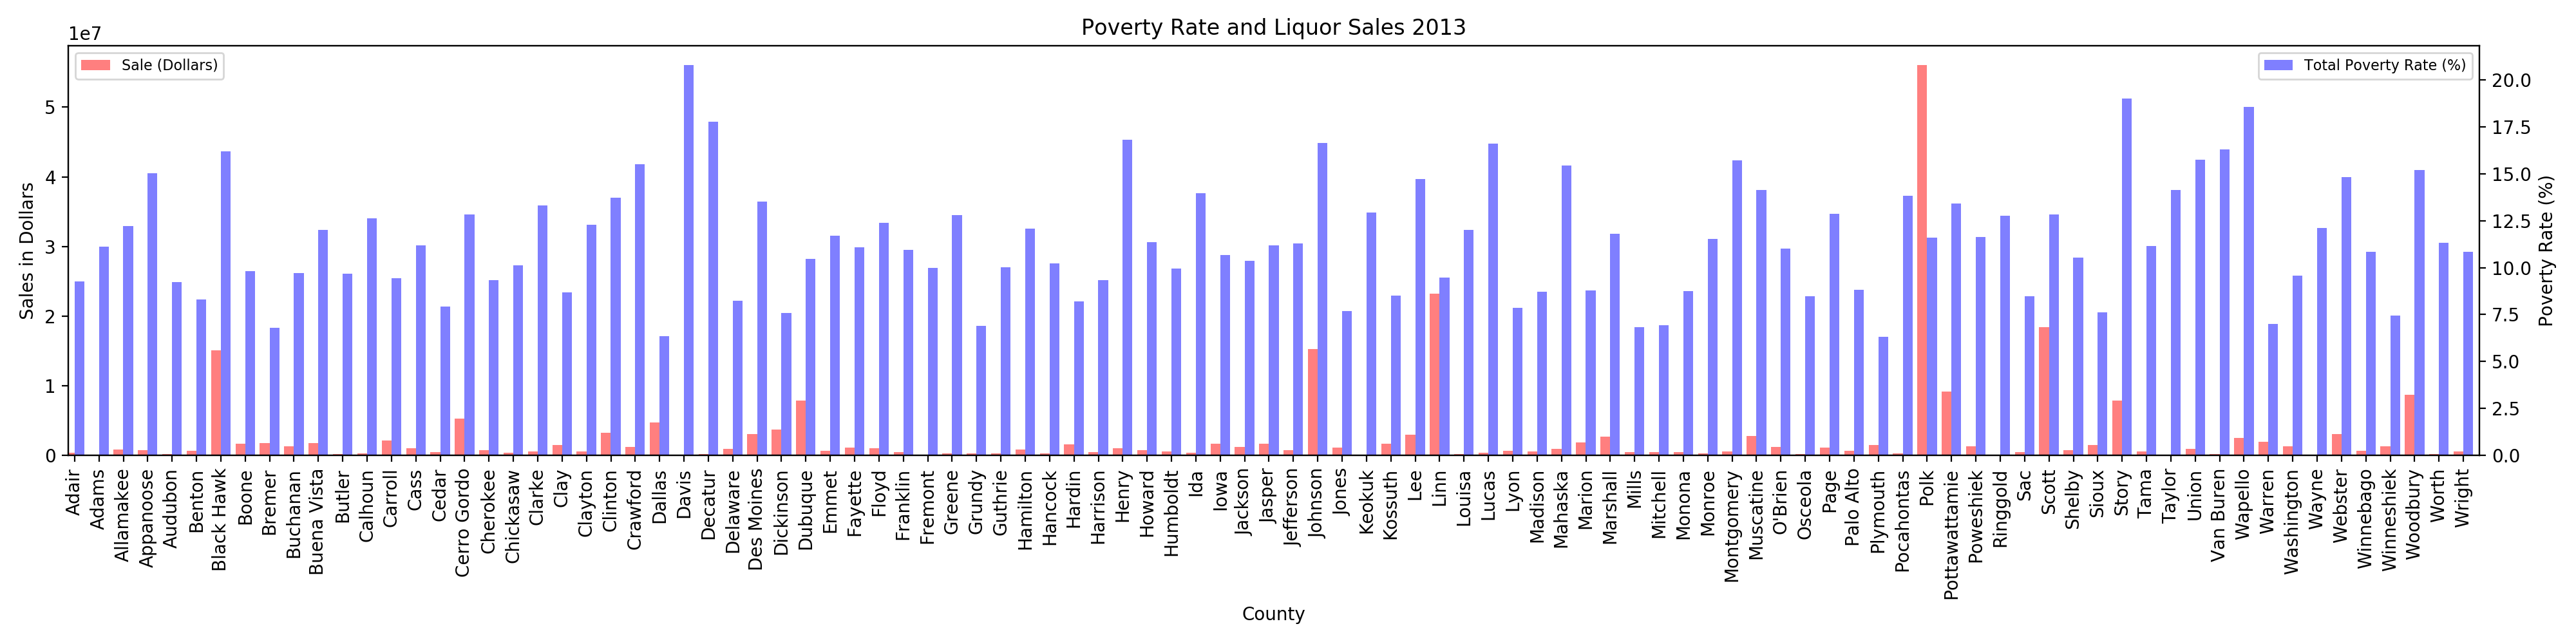

In [10]:
fig = plt.figure(figsize=(20,5)) 
ax = fig.add_subplot(111) 
ax2 = ax.twinx() 
width = 0.4

c13["Sale (Dollars)"].plot(kind='bar', color='r', alpha=0.5, ax=ax, width=width,  position=1, align="edge")
c13["Total Poverty Rate (%)"].plot(kind='bar', color='b', alpha=0.5, ax=ax2, width=width, position=0, align="edge")

ax.set_ylabel('Sales in Dollars')
ax2.set_ylabel('Poverty Rate (%)')
ax.set_xlabel('County')
ax.xaxis.set_ticks(np.arange(len(c13))+0.201)
ax.set_xticklabels(c13["County"])
ax.legend(loc='upper left', prop={'size': 8})
ax2.legend(loc='upper right', prop={'size': 8})
ax.set_title("Poverty Rate and Liquor Sales 2013")

plt.tight_layout()
plt.savefig("Bar Graph 2013.png")
plt.show()

<IPython.core.display.Javascript object>


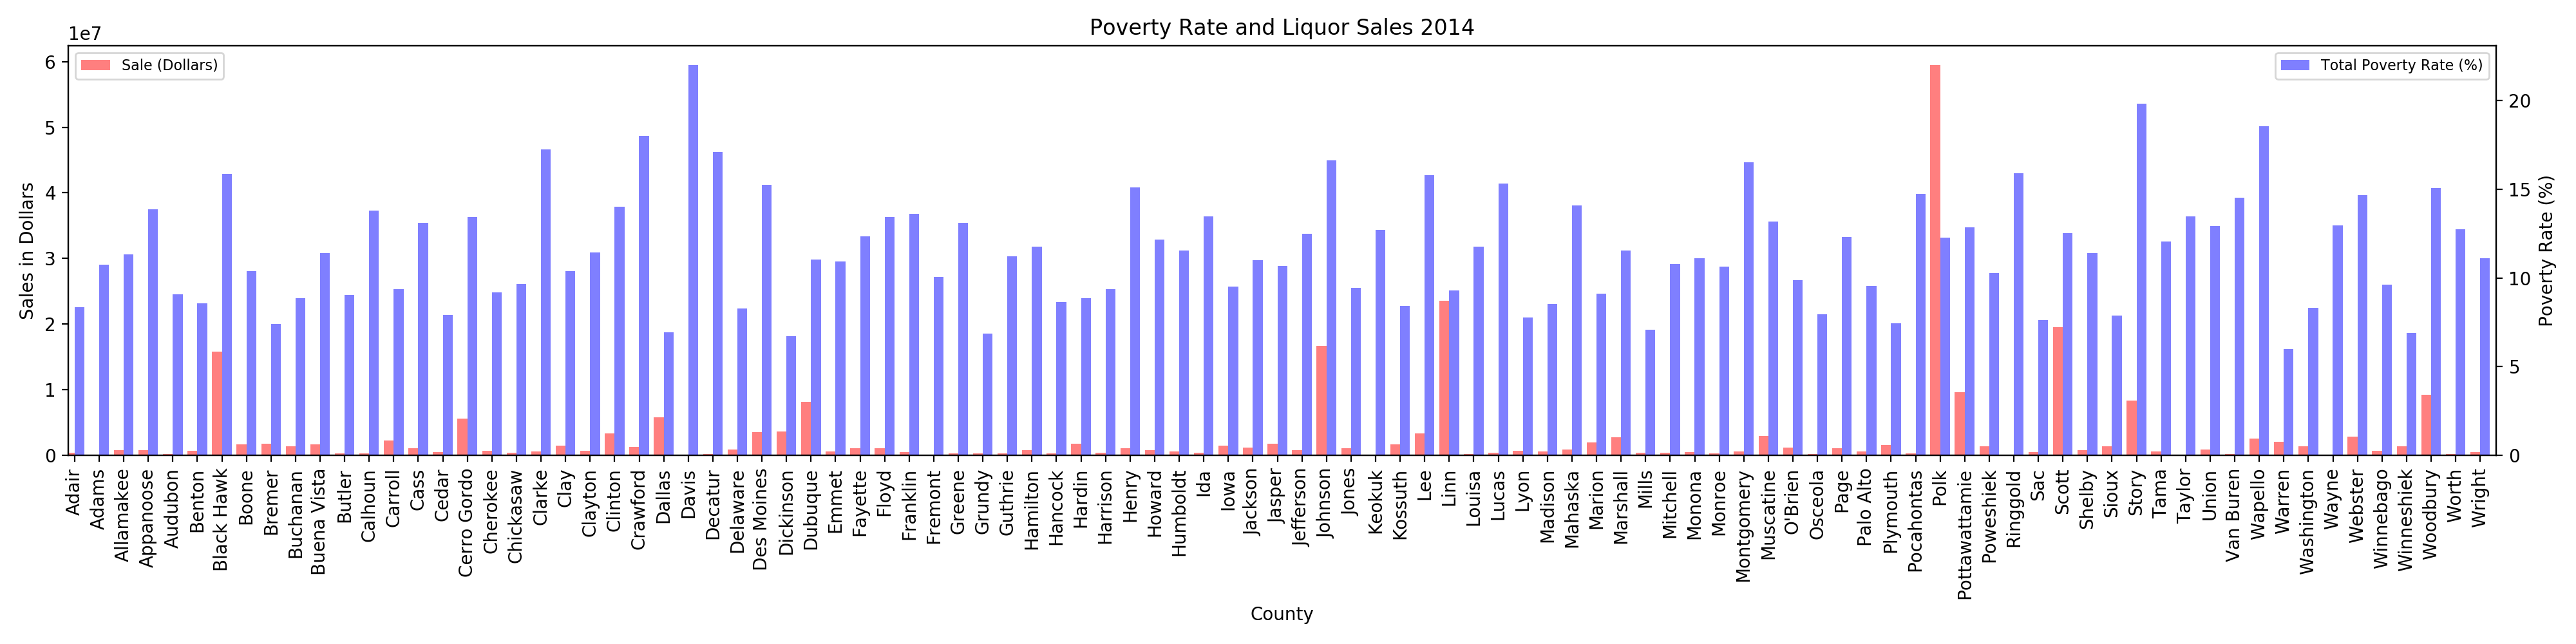

In [11]:
fig = plt.figure(figsize=(20,5)) 
ax = fig.add_subplot(111) 
ax2 = ax.twinx() 
width = 0.4

c14["Sale (Dollars)"].plot(kind='bar', color='r', alpha=0.5, ax=ax, width=width,  position=1, align="edge")
c14["Total Poverty Rate (%)"].plot(kind='bar', color='b', alpha=0.5, ax=ax2, width=width, position=0, align="edge")

ax.set_ylabel('Sales in Dollars')
ax2.set_ylabel('Poverty Rate (%)')
ax.set_xlabel('County')
ax.xaxis.set_ticks(np.arange(len(c14))+0.201)
ax.set_xticklabels(c14["County"])
ax.legend(loc='upper left', prop={'size': 8})
ax2.legend(loc='upper right', prop={'size': 8})
ax.set_title("Poverty Rate and Liquor Sales 2014")

plt.tight_layout()
plt.savefig("Bar Graph 2014.png")
plt.show()

<IPython.core.display.Javascript object>


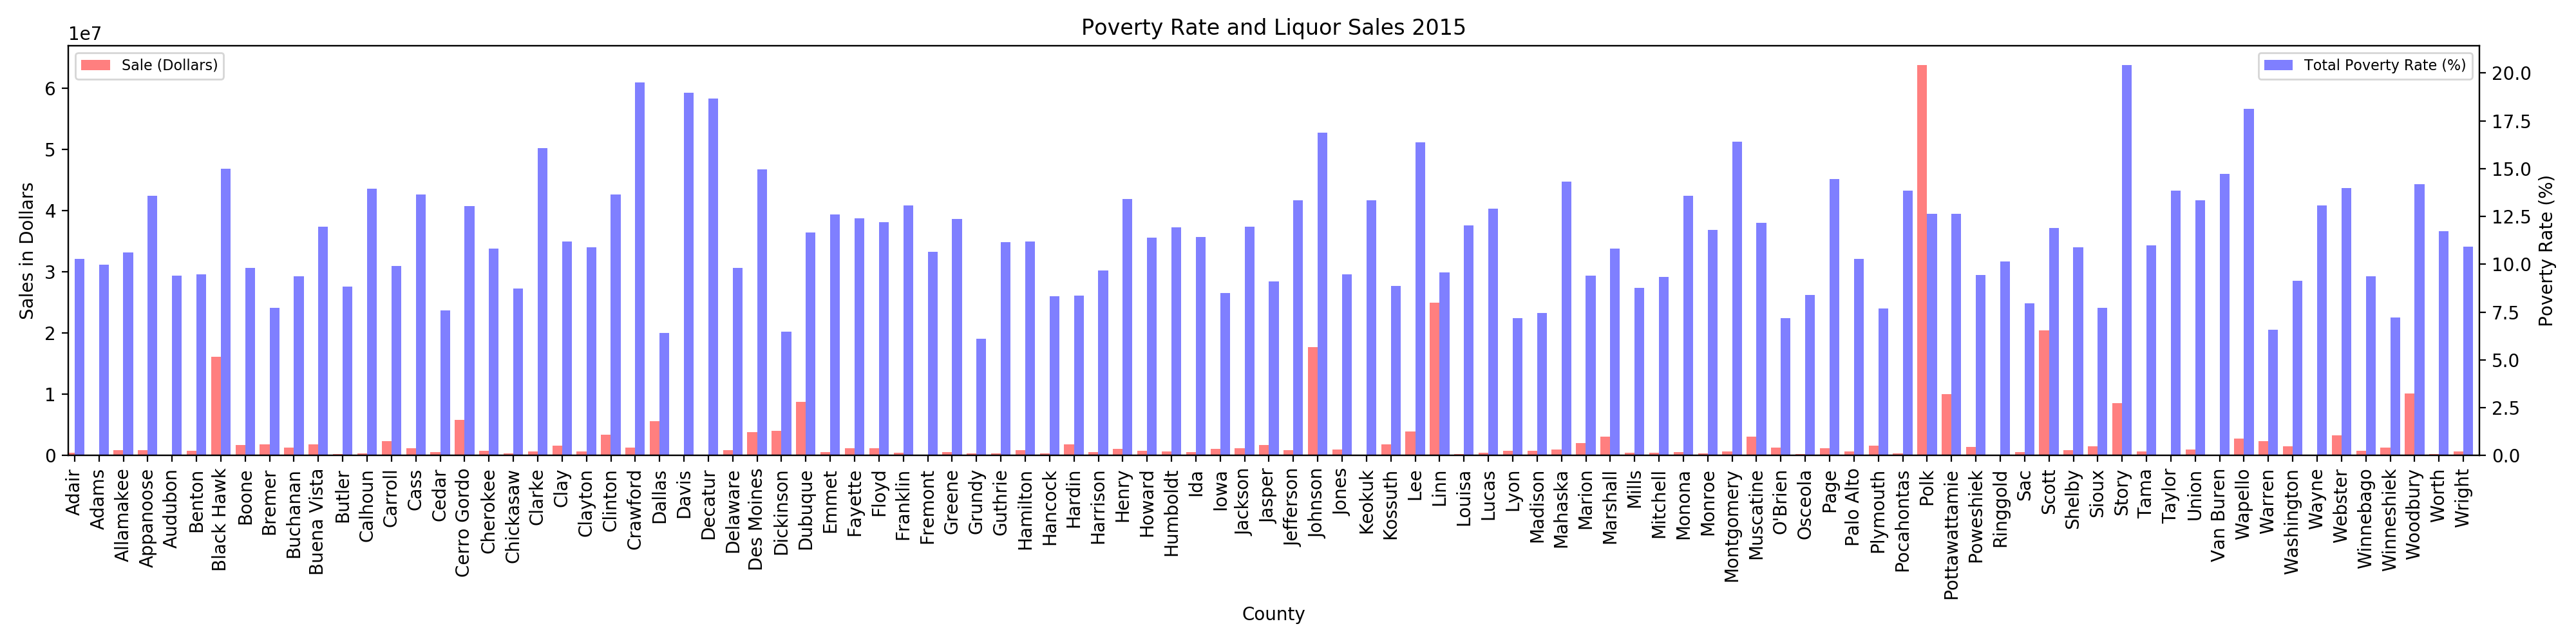

In [12]:
fig = plt.figure(figsize=(20,5)) 
ax = fig.add_subplot(111) 
ax2 = ax.twinx() 
width = 0.4

c15["Sale (Dollars)"].plot(kind='bar', color='r', alpha=0.5, ax=ax, width=width,  position=1, align="edge")
c15["Total Poverty Rate (%)"].plot(kind='bar', color='b', alpha=0.5, ax=ax2, width=width, position=0, align="edge")

ax.set_ylabel('Sales in Dollars')
ax2.set_ylabel('Poverty Rate (%)')
ax.set_xlabel('County')
ax.xaxis.set_ticks(np.arange(len(c15))+0.201)
ax.set_xticklabels(c15["County"])
ax.legend(loc='upper left', prop={'size': 8})
ax2.legend(loc='upper right', prop={'size': 8})
ax.set_title("Poverty Rate and Liquor Sales 2015")

plt.tight_layout()
plt.savefig("Bar Graph 2015.png")
plt.show()

<IPython.core.display.Javascript object>


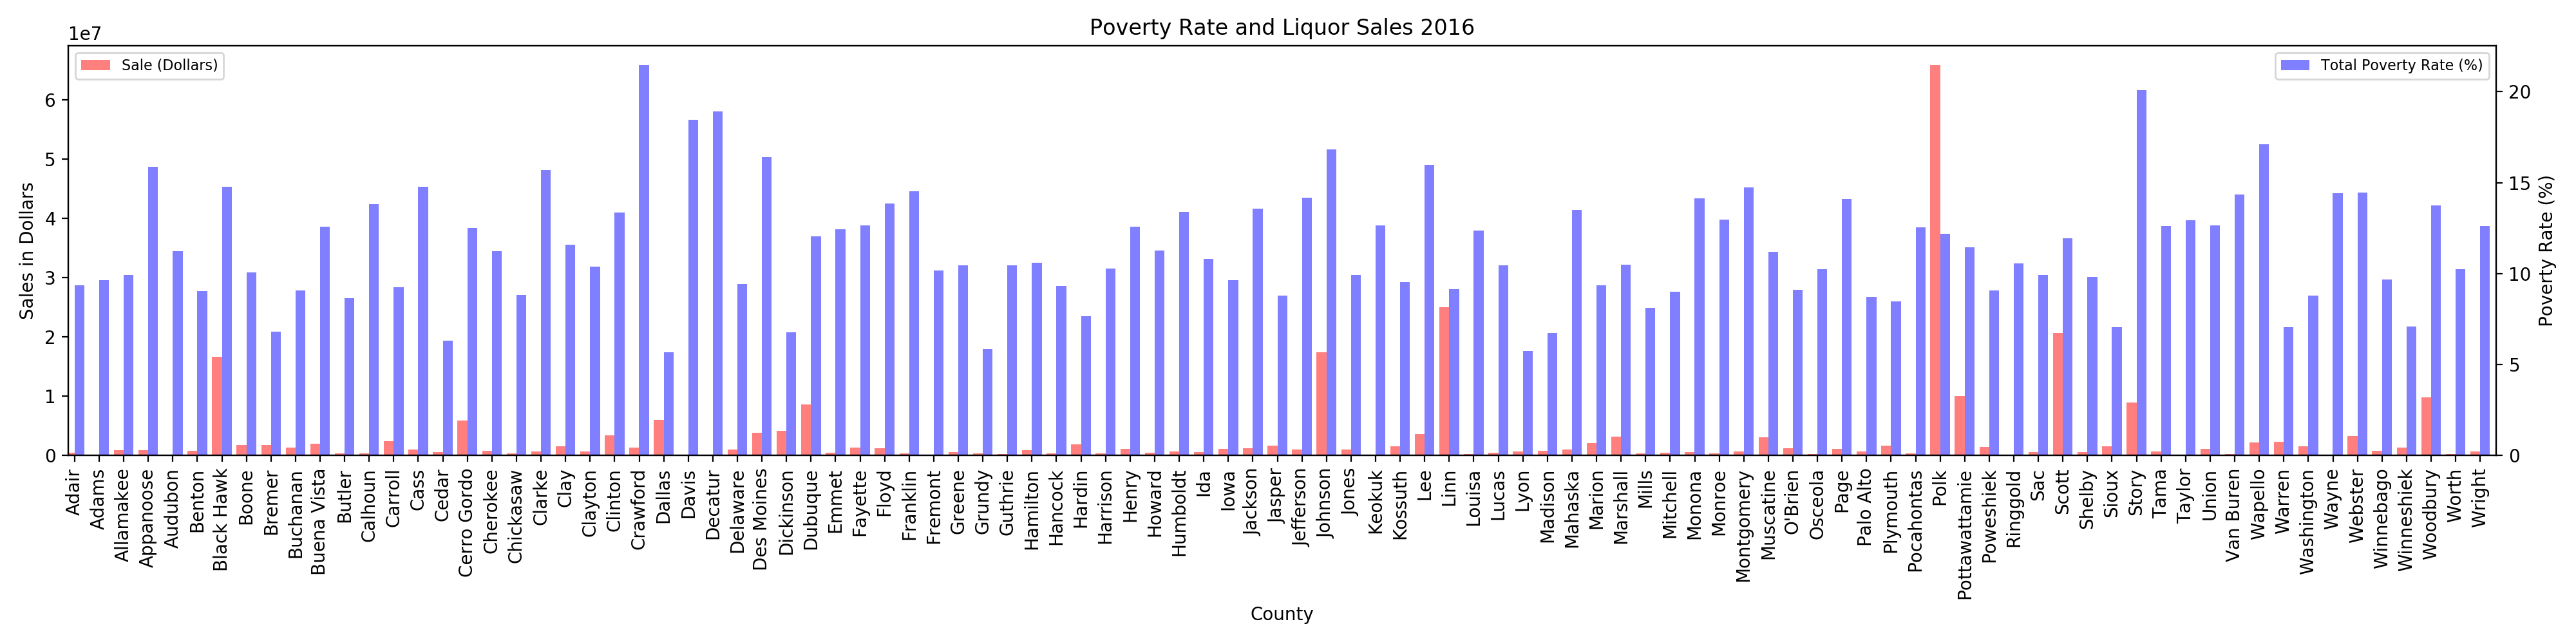

In [13]:
fig = plt.figure(figsize=(20,5)) 
ax = fig.add_subplot(111) 
ax2 = ax.twinx() 
width = 0.4

c16["Sale (Dollars)"].plot(kind='bar', color='r', alpha=0.5, ax=ax, width=width,  position=1, align="edge")
c16["Total Poverty Rate (%)"].plot(kind='bar', color='b', alpha=0.5, ax=ax2, width=width, position=0, align="edge")

ax.set_ylabel('Sales in Dollars')
ax2.set_ylabel('Poverty Rate (%)')
ax.set_xlabel('County')
ax.xaxis.set_ticks(np.arange(len(c16))+0.201)
ax.set_xticklabels(c16["County"])
ax.legend(loc='upper left', prop={'size': 8})
ax2.legend(loc='upper right', prop={'size': 8})
ax.set_title("Poverty Rate and Liquor Sales 2016")

plt.tight_layout()
plt.savefig("Bar Graph 2016.png")
plt.show()

<IPython.core.display.Javascript object>


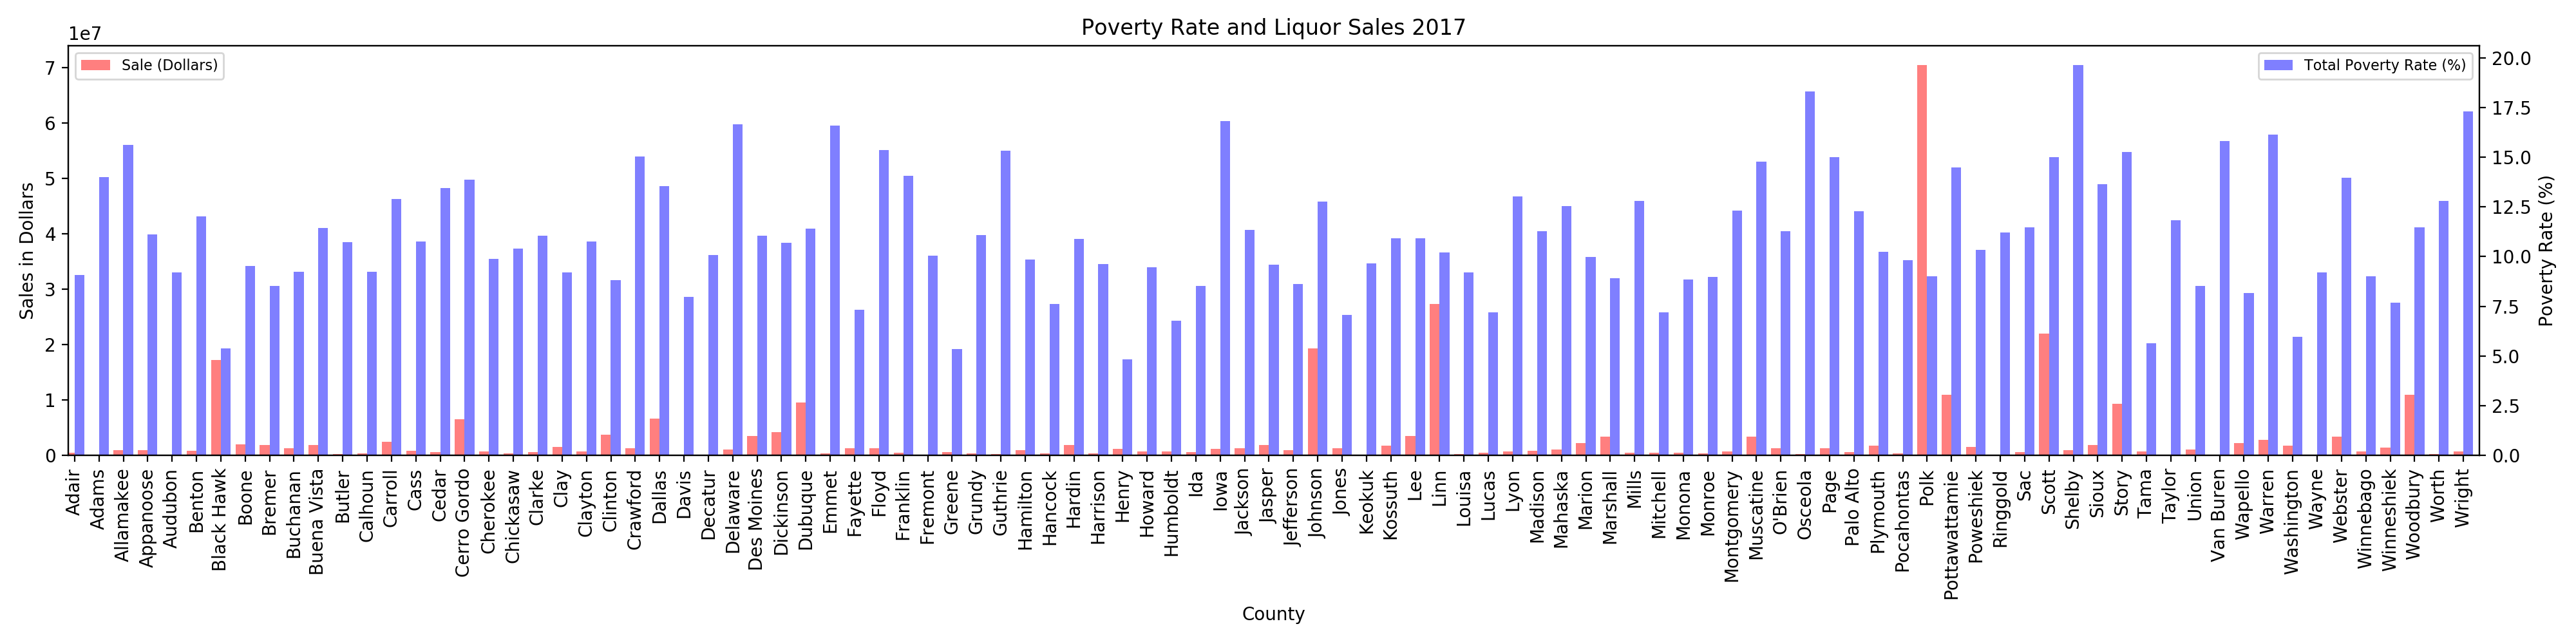

In [14]:
fig = plt.figure(figsize=(20,5)) 
ax = fig.add_subplot(111) 
ax2 = ax.twinx() 
width = 0.4

c17["Sale (Dollars)"].plot(kind='bar', color='r', alpha=0.5, ax=ax, width=width,  position=1, align="edge")
c17["Total Poverty Rate (%)"].plot(kind='bar', color='b', alpha=0.5, ax=ax2, width=width, position=0, align="edge")

ax.set_ylabel('Sales in Dollars')
ax2.set_ylabel('Poverty Rate (%)')
ax.set_xlabel('County')
ax.xaxis.set_ticks(np.arange(len(c17))+0.201)
ax.set_xticklabels(c17["County"])
ax.legend(loc='upper left', prop={'size': 8})
ax2.legend(loc='upper right', prop={'size': 8})
ax.set_title("Poverty Rate and Liquor Sales 2017")

plt.tight_layout()
plt.savefig("Bar Graph 2017.png")
plt.show()

<IPython.core.display.Javascript object>


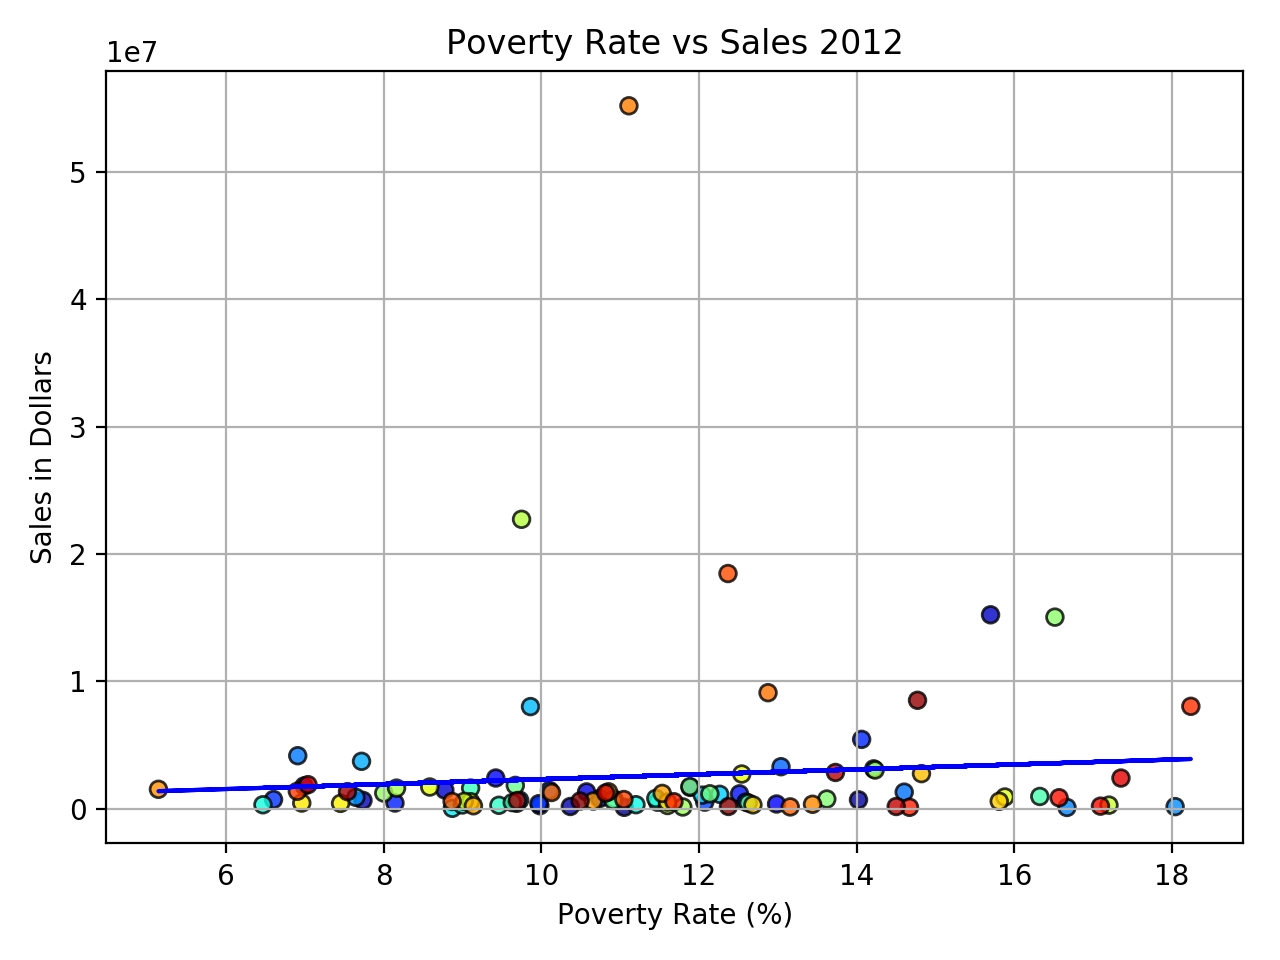

In [15]:
poverty_rate12 = c12.iloc[:,6]
sale12 = c12.iloc[:,2]
(slope, intercept, _, _, _) = linregress(poverty_rate12, sale12)
c12_fit = slope * poverty_rate12 + intercept

fig, ax = plt.subplots()
x=c12["Total Poverty Rate (%)"]
y=c12["Sale (Dollars)"]
t=np.arange(99)

ax.scatter(x, y, c=t, alpha=0.8, edgecolor="black", cmap='jet')
ax.plot(poverty_rate12, c12_fit, "b")
ax.grid()
ax.set_ylabel("Sales in Dollars")
ax.set_xlabel("Poverty Rate (%)")
ax.set_title("Poverty Rate vs Sales 2012")

plt.tight_layout()
plt.savefig("Poverty Rate vs Sales 2012.png")
plt.show()

<IPython.core.display.Javascript object>


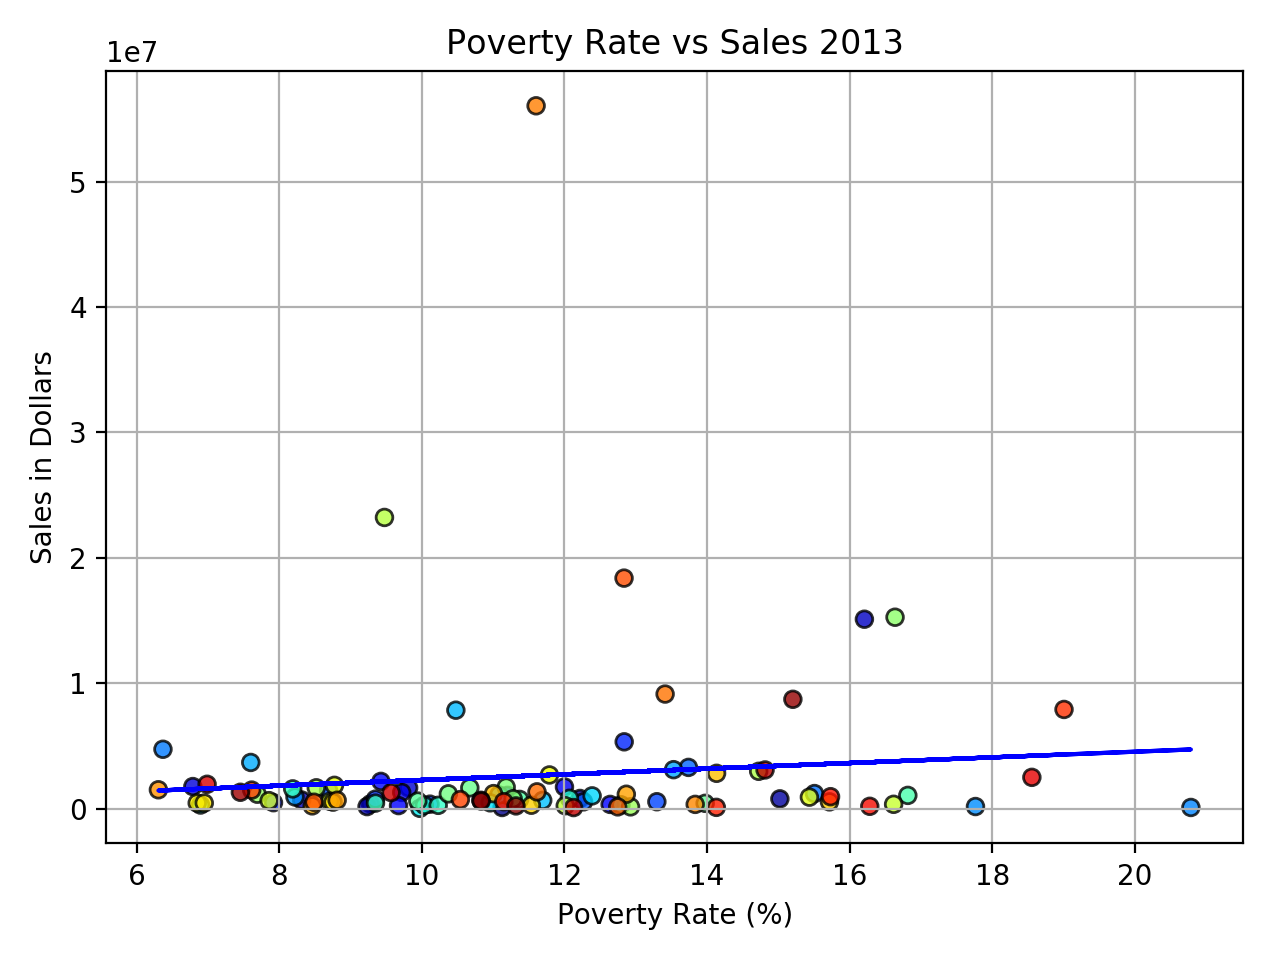

In [16]:
poverty_rate13 = c13.iloc[:,6]
sale13 = c13.iloc[:,2]
(slope, intercept, _, _, _) = linregress(poverty_rate13, sale13)
c13_fit = slope * poverty_rate13 + intercept

fig, ax = plt.subplots()
x=c13["Total Poverty Rate (%)"]
y=c13["Sale (Dollars)"]
t=np.arange(99)

ax.scatter(x, y, c=t, alpha=0.8, edgecolor="black", cmap='jet')
ax.plot(poverty_rate13, c13_fit, "b")
ax.grid()
ax.set_ylabel("Sales in Dollars")
ax.set_xlabel("Poverty Rate (%)")
ax.set_title("Poverty Rate vs Sales 2013")

plt.tight_layout()
plt.savefig("Poverty Rate vs Sales 2013.png")
plt.show()

<IPython.core.display.Javascript object>


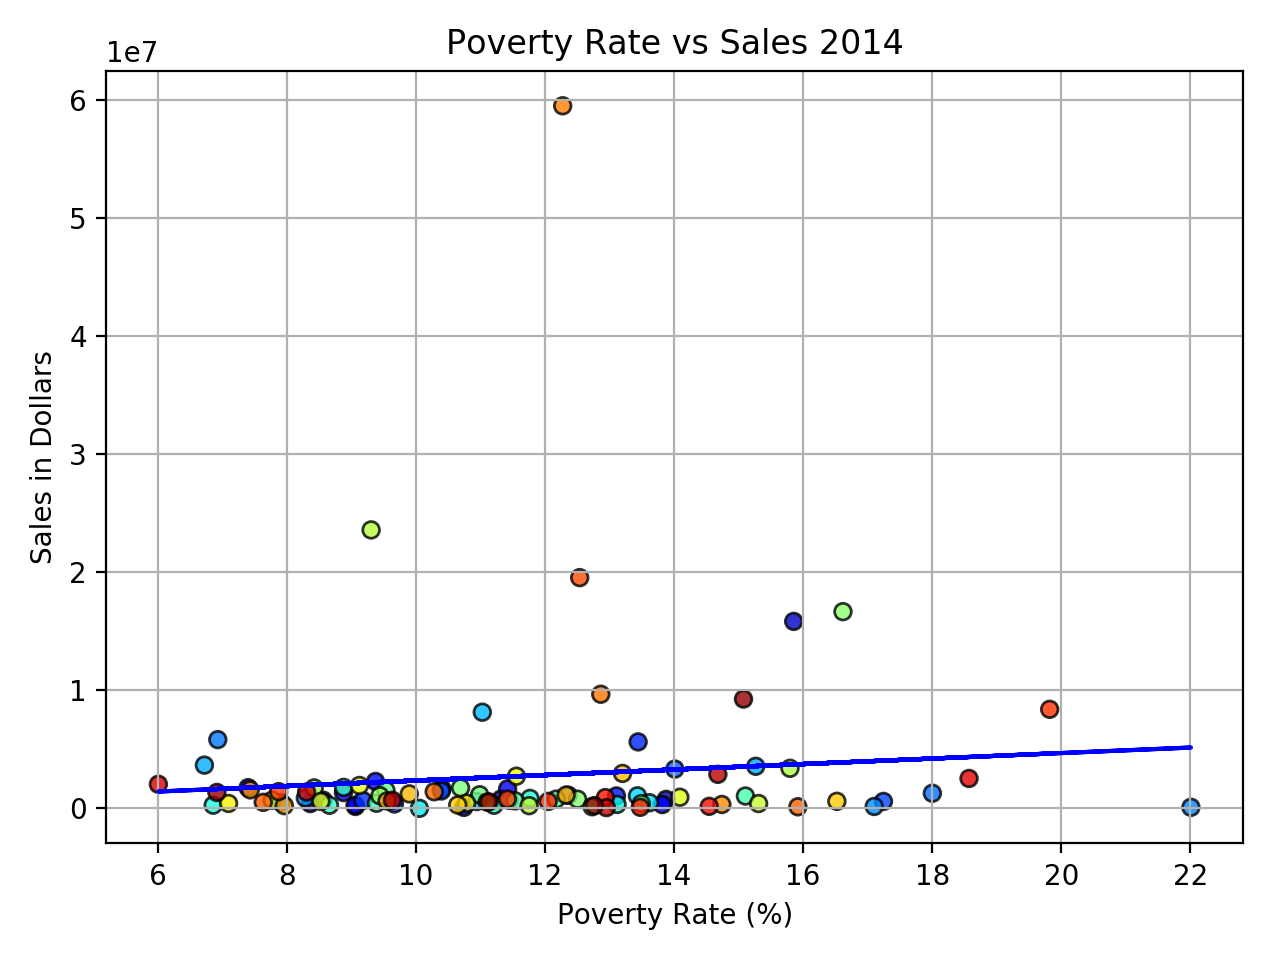

In [17]:
poverty_rate14 = c14.iloc[:,6]
sale14 = c14.iloc[:,2]
(slope, intercept, _, _, _) = linregress(poverty_rate14, sale14)
c14_fit = slope * poverty_rate14 + intercept

fig, ax = plt.subplots()
x=c14["Total Poverty Rate (%)"]
y=c14["Sale (Dollars)"]
t=np.arange(99)

ax.scatter(x, y, c=t, alpha=0.8, edgecolor="black", cmap='jet')
ax.plot(poverty_rate14, c14_fit, "b")
ax.grid()
ax.set_ylabel("Sales in Dollars")
ax.set_xlabel("Poverty Rate (%)")
ax.set_title("Poverty Rate vs Sales 2014")

plt.tight_layout()
plt.savefig("Poverty Rate vs Sales 2014.png")
plt.show()

<IPython.core.display.Javascript object>


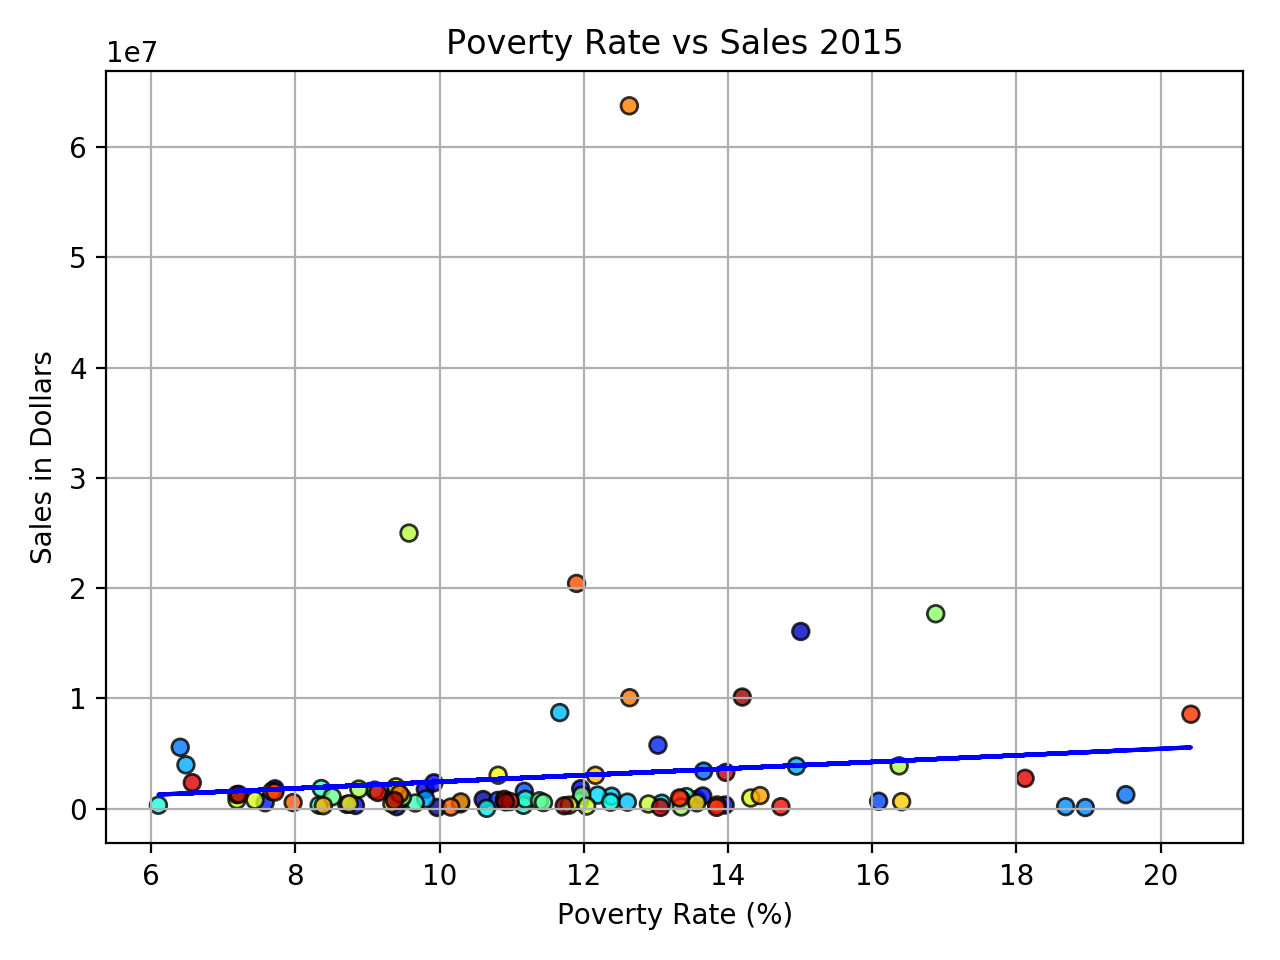

In [18]:
poverty_rate15 = c15.iloc[:,6]
sale15 = c15.iloc[:,2]
(slope, intercept, _, _, _) = linregress(poverty_rate15, sale15)
c15_fit = slope * poverty_rate15 + intercept

fig, ax = plt.subplots()
x=c15["Total Poverty Rate (%)"]
y=c15["Sale (Dollars)"]
t=np.arange(99)

ax.scatter(x, y, c=t, alpha=0.8, edgecolor="black", cmap='jet')
ax.plot(poverty_rate15, c15_fit, "b")
ax.grid()
ax.set_ylabel("Sales in Dollars")
ax.set_xlabel("Poverty Rate (%)")
ax.set_title("Poverty Rate vs Sales 2015")

plt.tight_layout()
plt.savefig("Poverty Rate vs Sales 2015.png")
plt.show()

<IPython.core.display.Javascript object>


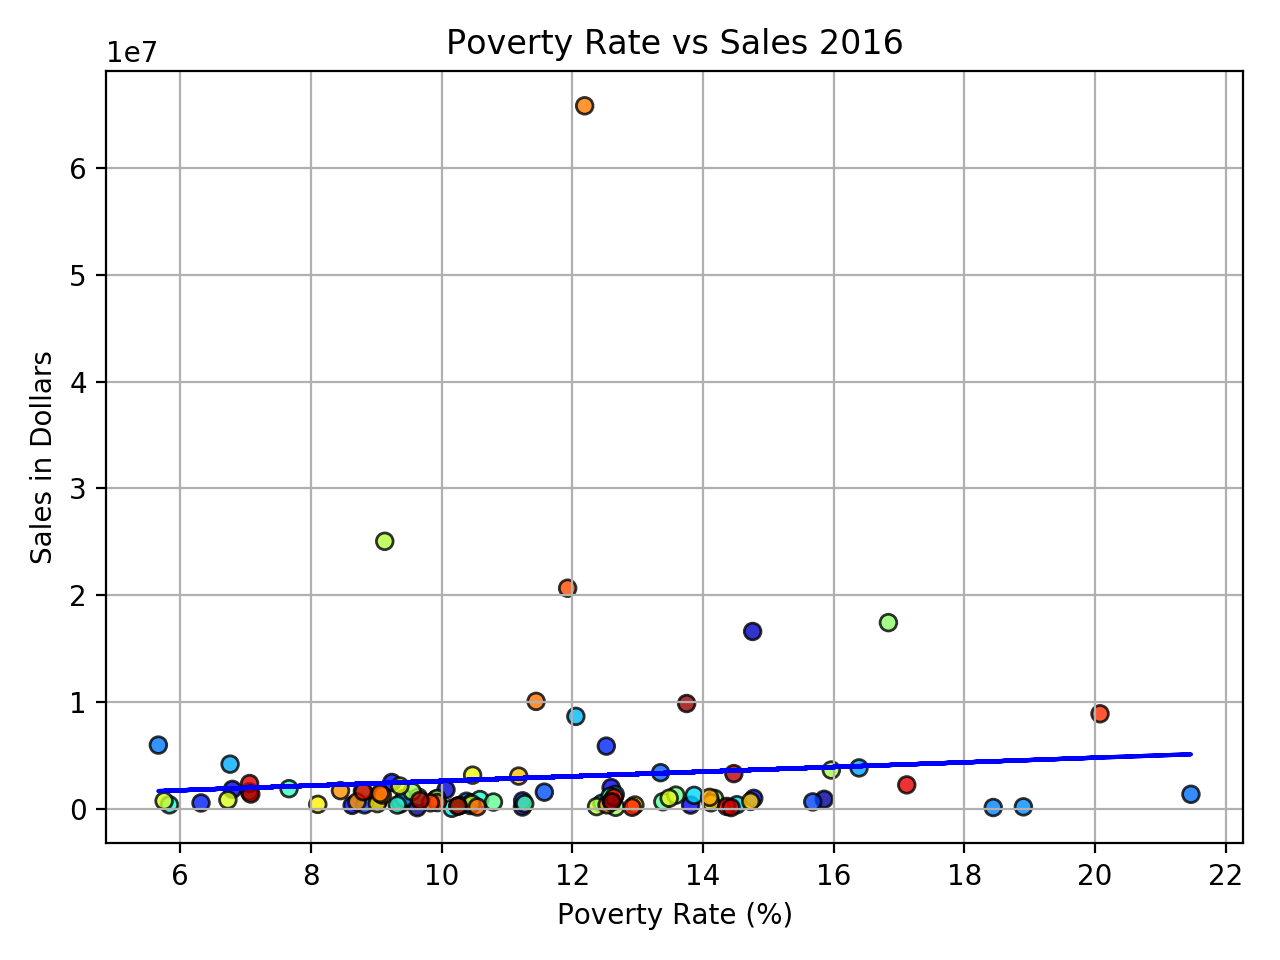

In [19]:
poverty_rate16 = c16.iloc[:,6]
sale16 = c16.iloc[:,2]
(slope, intercept, _, _, _) = linregress(poverty_rate16, sale16)
c16_fit = slope * poverty_rate16 + intercept

fig, ax = plt.subplots()
x=c16["Total Poverty Rate (%)"]
y=c16["Sale (Dollars)"]
t=np.arange(99)

ax.scatter(x, y, c=t, alpha=0.8, edgecolor="black", cmap='jet')
ax.plot(poverty_rate16, c16_fit, "b")
ax.grid()
ax.set_ylabel("Sales in Dollars")
ax.set_xlabel("Poverty Rate (%)")
ax.set_title("Poverty Rate vs Sales 2016")

plt.tight_layout()
plt.savefig("Poverty Rate vs Sales 2016.png")
plt.show()

<IPython.core.display.Javascript object>


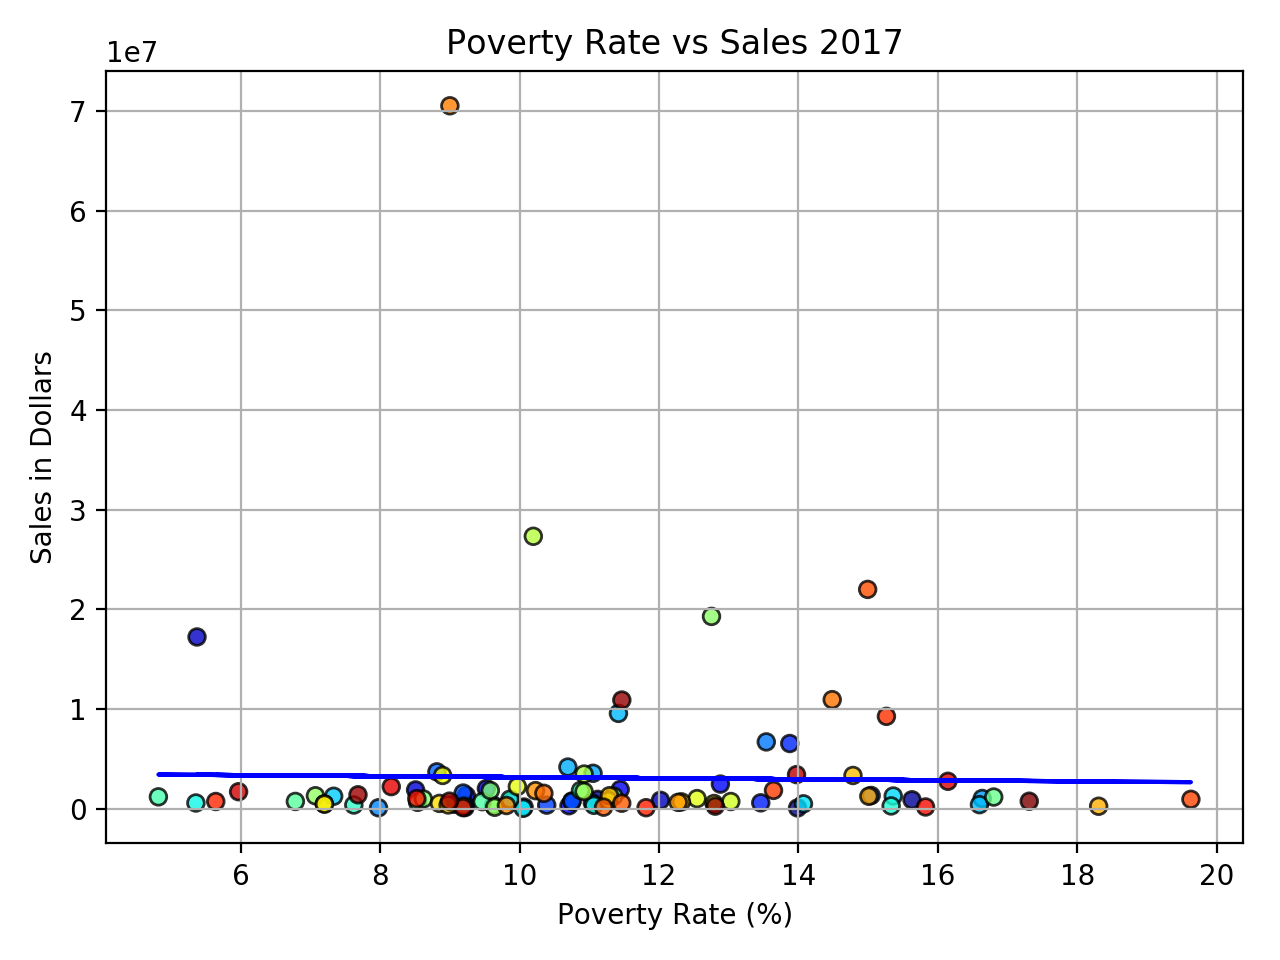

In [20]:
poverty_rate17 = c17.iloc[:,6]
sale17 = c17.iloc[:,2]
(slope, intercept, _, _, _) = linregress(poverty_rate17, sale17)
c17_fit = slope * poverty_rate17 + intercept

fig, ax = plt.subplots()
x=c17["Total Poverty Rate (%)"]
y=c17["Sale (Dollars)"]
t=np.arange(99)

ax.scatter(x, y, c=t, alpha=0.8, edgecolor="black", cmap='jet')
ax.plot(poverty_rate17, c17_fit, "b")
ax.grid()
ax.set_ylabel("Sales in Dollars")
ax.set_xlabel("Poverty Rate (%)")
ax.set_title("Poverty Rate vs Sales 2017")

plt.tight_layout()
plt.savefig("Poverty Rate vs Sales 2017.png")
plt.show()

In [21]:
zipcode = pd.read_csv('Other_Data/zipcode.csv')
liquorstores =  pd.read_csv('Other_Data/liquor_store_ia.csv')
del liquorstores["Unnamed: 0"]

In [22]:
zcpd12 = pd.read_csv('Zip_Code_Poverty_Data/2012_zipcode_data.csv')
zcpd13 = pd.read_csv('Zip_Code_Poverty_Data/2013_zipcode_data.csv')
zcpd14 = pd.read_csv('Zip_Code_Poverty_Data/2014_zipcode_data.csv')
zcpd15 = pd.read_csv('Zip_Code_Poverty_Data/2015_zipcode_data.csv')
zcpd16 = pd.read_csv('Zip_Code_Poverty_Data/2016_zipcode_data.csv')
zcpd17 = pd.read_csv('Zip_Code_Poverty_Data/2017_zipcode_data.csv')

In [30]:
cb12 = pd.merge(zcpd12, zipcode, on="Zip Code")
lp12 = pd.merge(cb12, liquorstores, on="Zip Code", how="inner")
del lp12["City_y"]
lp12 = lp12.rename(columns={"City_x":"City"})

cb13 = pd.merge(zcpd13, zipcode, on="Zip Code")
lp13 = pd.merge(cb13, liquorstores, on="Zip Code", how="inner")
del lp13["City_y"]
lp13 = lp13.rename(columns={"City_x":"City"})

cb14 = pd.merge(zcpd14, zipcode, on="Zip Code")
lp14 = pd.merge(cb14, liquorstores, on="Zip Code", how="inner")
del lp14["City_y"]
lp14 = lp14.rename(columns={"City_x":"City"})

cb15 = pd.merge(zcpd15, zipcode, on="Zip Code")
lp15 = pd.merge(cb15, liquorstores, on="Zip Code", how="inner")
del lp15["City_y"]
lp15 = lp15.rename(columns={"City_x":"City"})

cb16 = pd.merge(zcpd16, zipcode, on="Zip Code")
lp16 = pd.merge(cb16, liquorstores, on="Zip Code", how="inner")
del lp16["City_y"]
lp16 = lp16.rename(columns={"City_x":"City"})

cb17 = pd.merge(zcpd17, zipcode, on="Zip Code")
lp17 = pd.merge(cb17, liquorstores, on="Zip Code", how="inner")
del lp17["City_y"]
lp17 = lp17.rename(columns={"City_x":"City"})

<IPython.core.display.Javascript object>


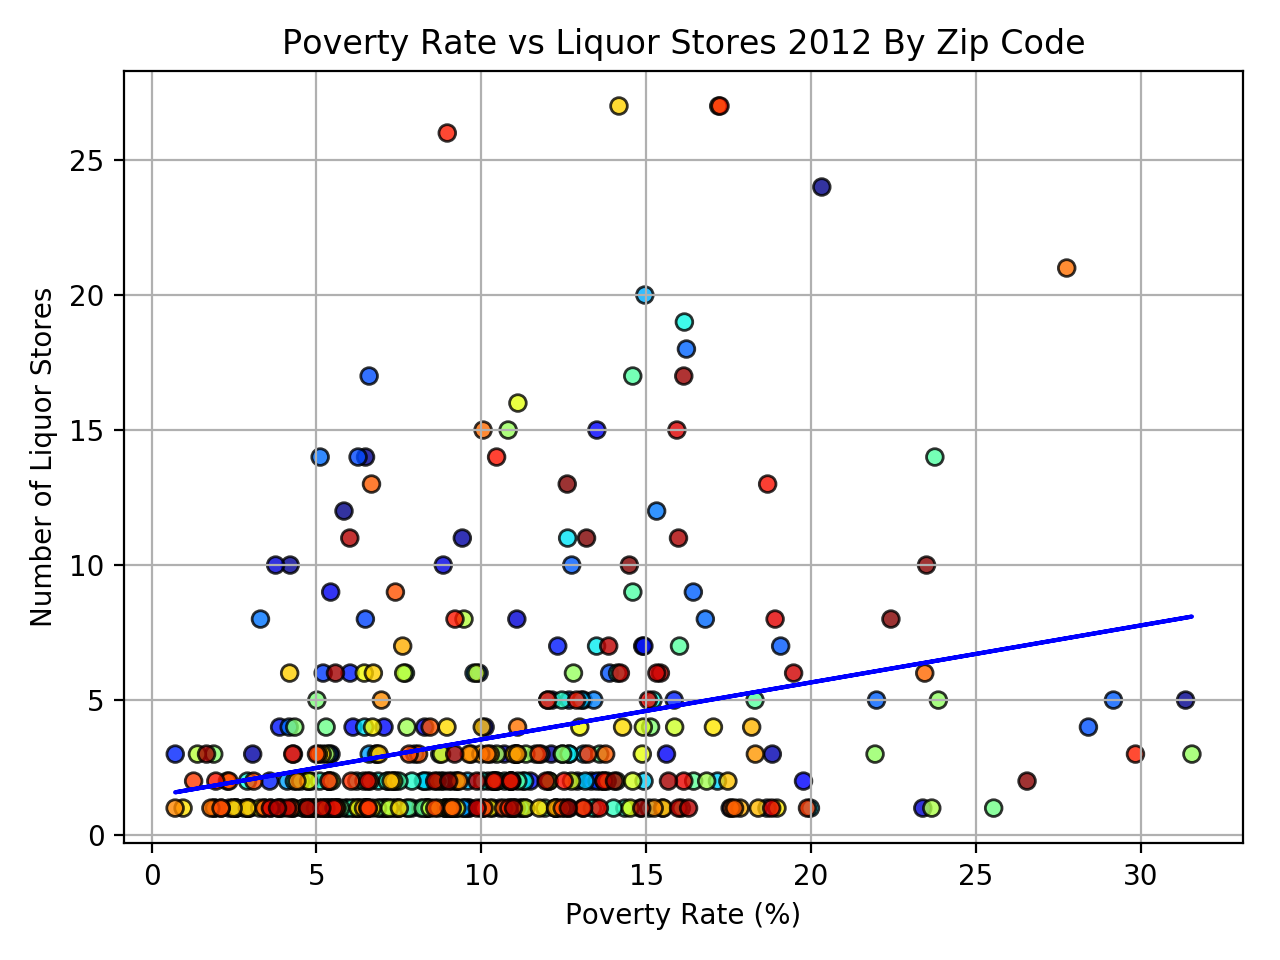

0.21108210760403257


In [24]:
data12 = lp12.groupby("Zip Code")
lstores12 = data12["County"].count()
prate12 = data12["Total Poverty Rate (%)"].sum() / data12["Total Poverty Rate (%)"].count()
data12_df = pd.DataFrame({"Poverty Rate": prate12, "Total Number of Liquor Stores": lstores12})

p_rate12 = data12_df.iloc[:,0]
stores12 = data12_df.iloc[:,1]
(slope, intercept, _, _, _) = linregress(p_rate12, stores12)
data12_df_fit = slope * p_rate12 + intercept

fig, ax = plt.subplots()
x=data12_df["Poverty Rate"]
y=data12_df["Total Number of Liquor Stores"]
t=np.arange(437)

ax.scatter(x, y, c=t, alpha=0.8, edgecolor="black", cmap='jet')
ax.grid()
ax.plot(p_rate12, data12_df_fit, "b")
ax.set_ylabel("Number of Liquor Stores")
ax.set_xlabel("Poverty Rate (%)")
ax.set_title("Poverty Rate vs Liquor Stores 2012 By Zip Code")

plt.tight_layout()
plt.savefig("Poverty Rate vs Store Count 2012.png")
plt.show()
print(slope)

<IPython.core.display.Javascript object>


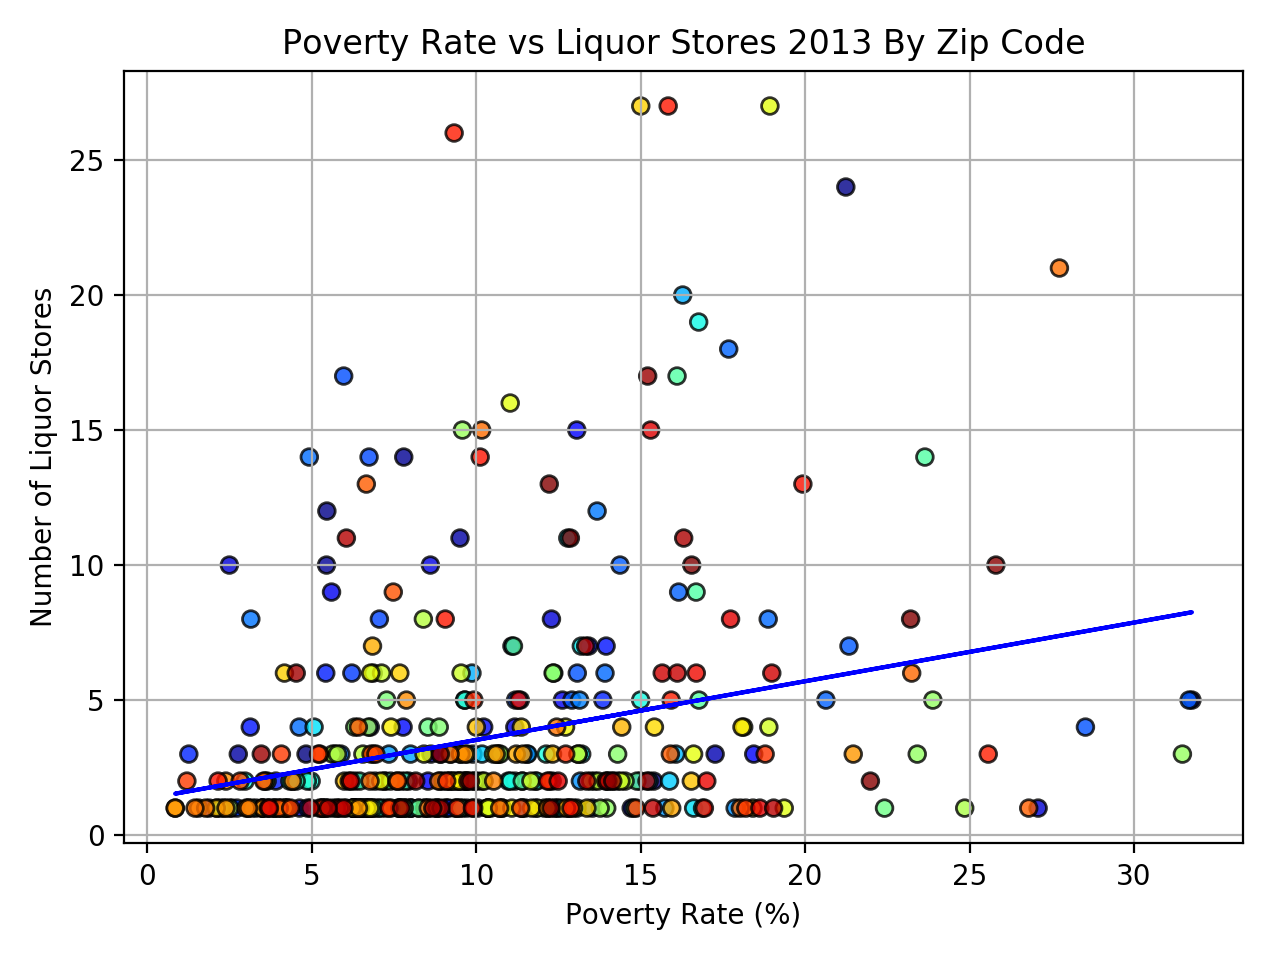

0.21736972078458805


In [25]:
data13 = lp13.groupby("Zip Code")
lstores13 = data13["County"].count()
prate13 = data13["Total Poverty Rate (%)"].sum() / data13["Total Poverty Rate (%)"].count()
data13_df = pd.DataFrame({"Poverty Rate": prate13, "Total Number of Liquor Stores": lstores13})

p_rate13 = data13_df.iloc[:,0]
stores13 = data13_df.iloc[:,1]
(slope, intercept, _, _, _) = linregress(p_rate13, stores13)
data13_df_fit = slope * p_rate13 + intercept

fig, ax = plt.subplots()
x=data13_df["Poverty Rate"]
y=data13_df["Total Number of Liquor Stores"]
t=np.arange(437)

ax.scatter(x, y, c=t, alpha=0.8, edgecolor="black", cmap='jet')
ax.grid()
ax.plot(p_rate13, data13_df_fit, "b")
ax.set_ylabel("Number of Liquor Stores")
ax.set_xlabel("Poverty Rate (%)")
ax.set_title("Poverty Rate vs Liquor Stores 2013 By Zip Code")

plt.tight_layout()
plt.savefig("Poverty Rate vs Store Count 2013.png")
plt.show()
print(slope)

<IPython.core.display.Javascript object>


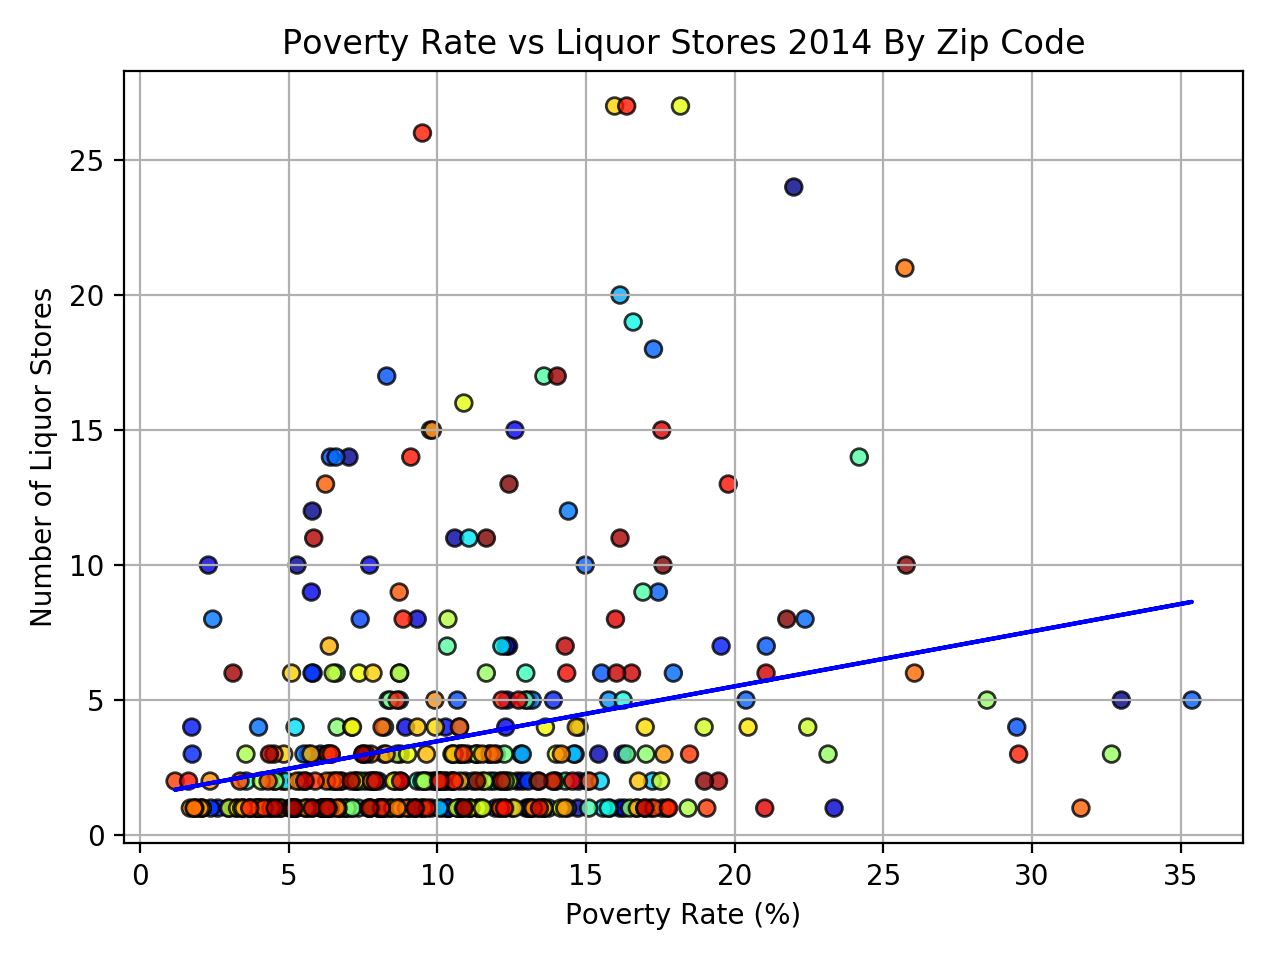

0.20334211163429247


In [26]:
data14 = lp14.groupby("Zip Code")
lstores14 = data14["County"].count()
prate14 = data14["Total Poverty Rate (%)"].sum() / data14["Total Poverty Rate (%)"].count()
data14_df = pd.DataFrame({"Poverty Rate": prate14, "Total Number of Liquor Stores": lstores14})

p_rate14 = data14_df.iloc[:,0]
stores14 = data14_df.iloc[:,1]
(slope, intercept, _, _, _) = linregress(p_rate14, stores14)
data14_df_fit = slope * p_rate14 + intercept

fig, ax = plt.subplots()
x=data14_df["Poverty Rate"]
y=data14_df["Total Number of Liquor Stores"]
t=np.arange(437)

ax.scatter(x, y, c=t, alpha=0.8, edgecolor="black", cmap='jet')
ax.grid()
ax.plot(p_rate14, data14_df_fit, "b")
ax.set_ylabel("Number of Liquor Stores")
ax.set_xlabel("Poverty Rate (%)")
ax.set_title("Poverty Rate vs Liquor Stores 2014 By Zip Code")

plt.tight_layout()
plt.savefig("Poverty Rate vs Store Count 2014.png")
plt.show()
print(slope)

<IPython.core.display.Javascript object>


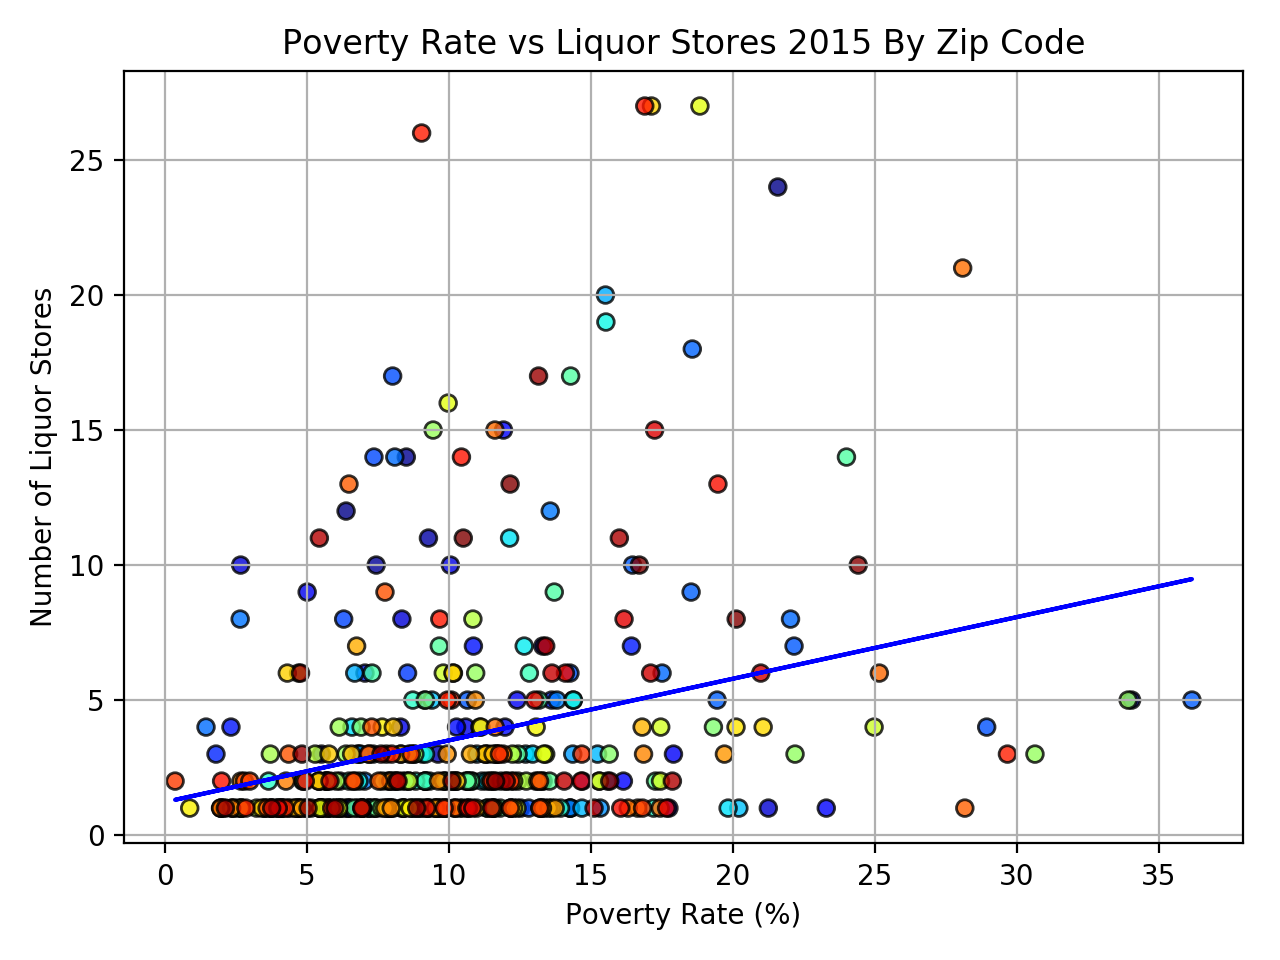

0.22816343305287337


In [27]:
data15 = lp15.groupby("Zip Code")
lstores15 = data15["County"].count()
prate15 = data15["Total Poverty Rate (%)"].sum() / data15["Total Poverty Rate (%)"].count()
data15_df = pd.DataFrame({"Poverty Rate": prate15, "Total Number of Liquor Stores": lstores15})

p_rate15 = data15_df.iloc[:,0]
stores15 = data15_df.iloc[:,1]
(slope, intercept, _, _, _) = linregress(p_rate15, stores15)
data15_df_fit = slope * p_rate15 + intercept

fig, ax = plt.subplots()
x=data15_df["Poverty Rate"]
y=data15_df["Total Number of Liquor Stores"]
t=np.arange(437)

ax.scatter(x, y, c=t, alpha=0.8, edgecolor="black", cmap='jet')
ax.grid()
ax.plot(p_rate15, data15_df_fit, "b")
ax.set_ylabel("Number of Liquor Stores")
ax.set_xlabel("Poverty Rate (%)")
ax.set_title("Poverty Rate vs Liquor Stores 2015 By Zip Code")

plt.tight_layout()
plt.savefig("Poverty Rate vs Store Count 2015.png")
plt.show()
print(slope)

<IPython.core.display.Javascript object>


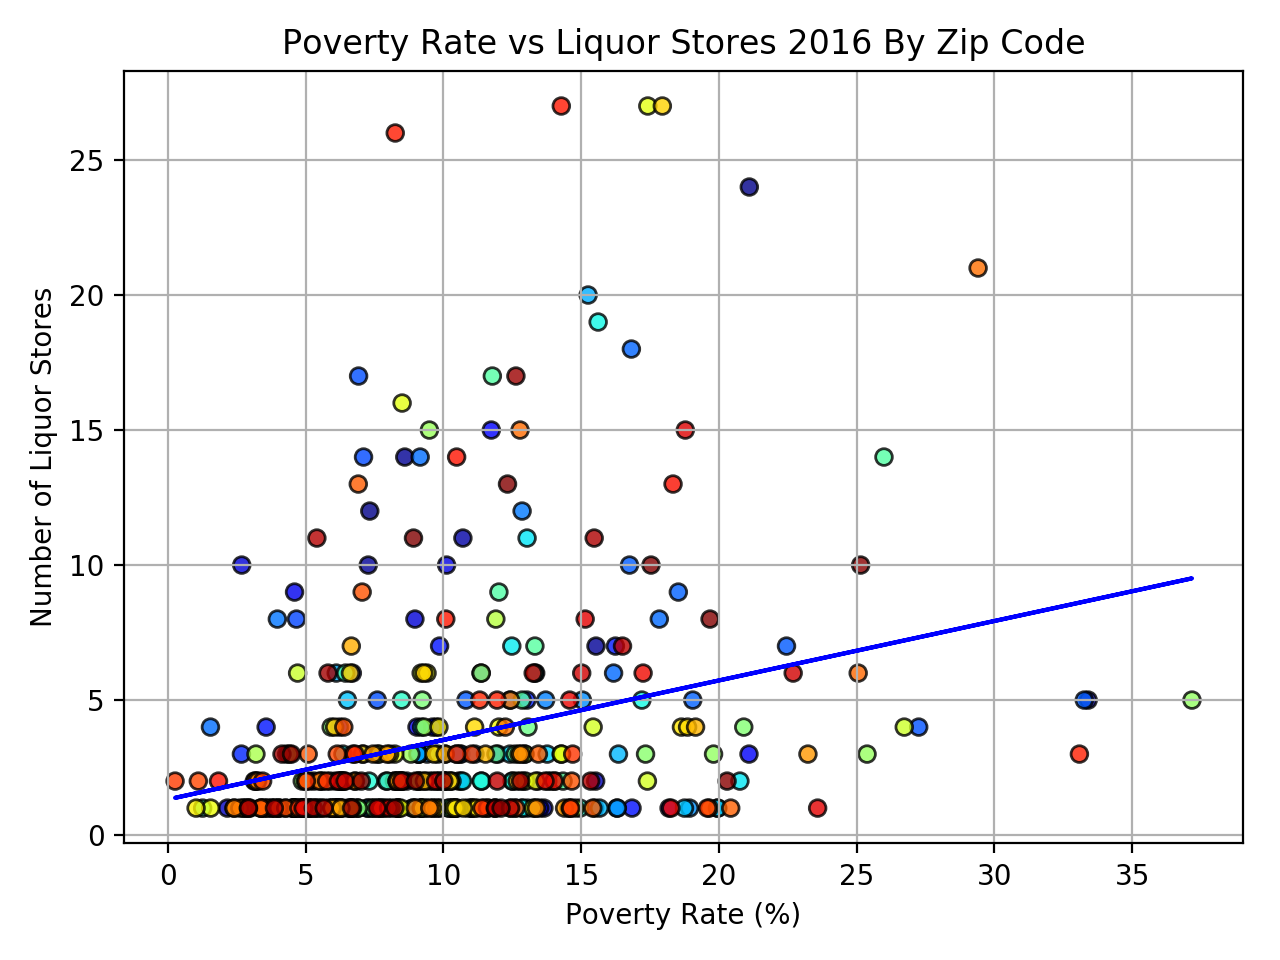

0.22023362526040002


In [28]:
data16 = lp16.groupby("Zip Code")
lstores16 = data16["County"].count()
prate16 = data16["Total Poverty Rate (%)"].sum() / data16["Total Poverty Rate (%)"].count()
data16_df = pd.DataFrame({"Poverty Rate": prate16, "Total Number of Liquor Stores": lstores16})

p_rate16 = data16_df.iloc[:,0]
stores16 = data16_df.iloc[:,1]
(slope, intercept, _, _, _) = linregress(p_rate16, stores16)
data16_df_fit = slope * p_rate16 + intercept

fig, ax = plt.subplots()
x=data16_df["Poverty Rate"]
y=data16_df["Total Number of Liquor Stores"]
t=np.arange(437)

ax.scatter(x, y, c=t, alpha=0.8, edgecolor="black", cmap='jet')
ax.grid()
ax.plot(p_rate16, data16_df_fit, "b")
ax.set_ylabel("Number of Liquor Stores")
ax.set_xlabel("Poverty Rate (%)")
ax.set_title("Poverty Rate vs Liquor Stores 2016 By Zip Code")

plt.tight_layout()
plt.savefig("Poverty Rate vs Store Count 2016.png")
plt.show()
print(slope)

<IPython.core.display.Javascript object>


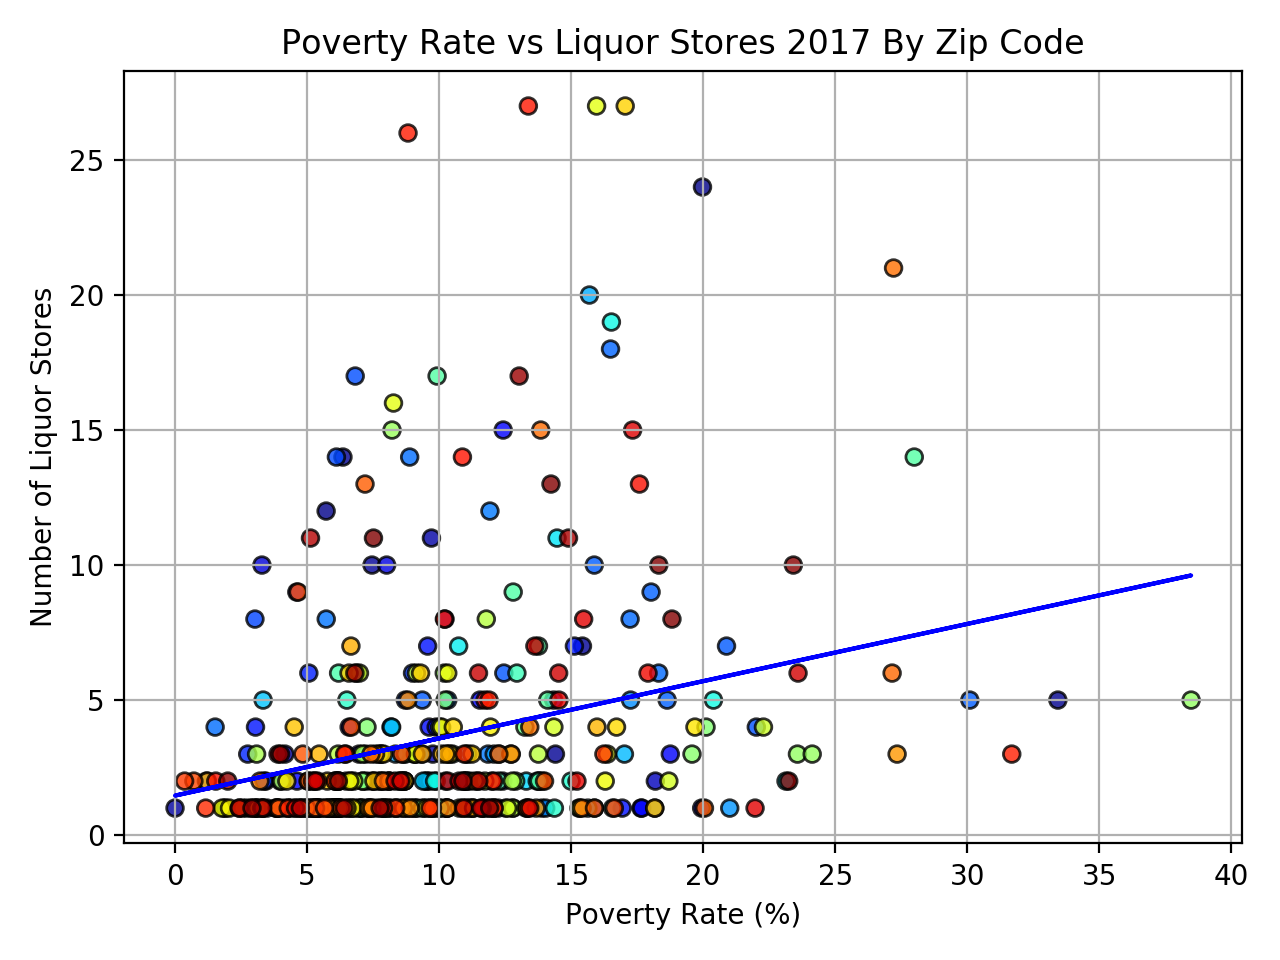

0.2118875798940808


In [29]:
data17 = lp17.groupby("Zip Code")
lstores17 = data17["County"].count()
prate17 = data17["Total Poverty Rate (%)"].sum() / data17["Total Poverty Rate (%)"].count()
data17_df = pd.DataFrame({"Poverty Rate": prate17, "Total Number of Liquor Stores": lstores17})

p_rate17 = data17_df.iloc[:,0]
stores17 = data17_df.iloc[:,1]
(slope, intercept, _, _, _) = linregress(p_rate17, stores17)
data17_df_fit = slope * p_rate17 + intercept

fig, ax = plt.subplots()
x=data17_df["Poverty Rate"]
y=data17_df["Total Number of Liquor Stores"]
t=np.arange(437)

ax.scatter(x, y, c=t, alpha=0.8, edgecolor="black", cmap='jet')
ax.grid()
ax.plot(p_rate17, data17_df_fit, "b")
ax.set_ylabel("Number of Liquor Stores")
ax.set_xlabel("Poverty Rate (%)")
ax.set_title("Poverty Rate vs Liquor Stores 2017 By Zip Code")

plt.tight_layout()
plt.savefig("Poverty Rate vs Store Count 2017.png")
plt.show()
print(slope)